## Pytorch

In [1]:
import torch

# Create a 3-dimensional tensor
images = torch.rand((4, 28, 28))

# Get the second image
second_image = images[1]

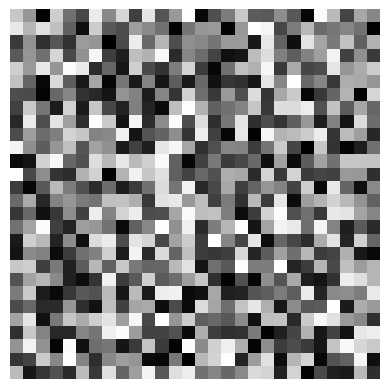

In [3]:
import matplotlib.pyplot as plt

plt.imshow(second_image, cmap='gray')
plt.axis('off') # disable axes
plt.show()

In [4]:
a = torch.tensor([[1, 1], [1, 0]])

print(a)
# tensor([[1, 1],
#         [1, 0]])

print(torch.matrix_power(a, 2))
# tensor([[2, 1],
#         [1, 1]])

print(torch.matrix_power(a, 3))
# tensor([[3, 2],
#         [2, 1]])

print(torch.matrix_power(a, 4))
# tensor([[5, 3],
#         [3, 2]])

tensor([[1, 1],
        [1, 0]])
tensor([[2, 1],
        [1, 1]])
tensor([[3, 2],
        [2, 1]])
tensor([[5, 3],
        [3, 2]])


In [5]:
import torch
import torch.nn as nn

class MLP(nn.Module):
        def __init__(self, input_size):
            super(MLP, self).__init__()
            self.hidden_layer = nn.Linear(input_size, 64)
            self.output_layer = nn.Linear(64, 2)
            self.activation = nn.ReLU()

        def forward(self, x):
            x = self.activation(self.hidden_layer(x))
            return self.output_layer(x)

model = MLP(input_size=10)
print(model)

MLP(
  (hidden_layer): Linear(in_features=10, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=2, bias=True)
  (activation): ReLU()
)


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

class NumberSumDataset(Dataset):
    def __init__(self, data_range=(1, 10)):
        self.numbers = list(range(data_range[0], data_range[1]))

    def __getitem__(self, index):
        number1 = float(self.numbers[index // len(self.numbers)])
        number2 = float(self.numbers[index % len(self.numbers)])
        return torch.tensor([number1, number2]), torch.tensor([number1 + number2])

    def __len__(self):
        return len(self.numbers) ** 2

In [7]:
dataset = NumberSumDataset(data_range=(1, 100))

In [8]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.hidden_layer = nn.Linear(input_size, 128)
        self.output_layer = nn.Linear(128, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.hidden_layer(x))
        return self.output_layer(x)

In [9]:
dataset = NumberSumDataset(data_range=(0, 100))
dataloader = DataLoader(dataset, batch_size=100, shuffle=True)
model = MLP(input_size=2)
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [11]:
for epoch in range(20):
    total_loss = 0.0
    for number_pairs, sums in dataloader:  # Iterate over the batches
        predictions = model(number_pairs)  # Compute the model output
        loss = loss_function(predictions, sums)  # Compute the loss
        loss.backward()  # Perform backpropagation
        optimizer.step()  # Update the parameters
        optimizer.zero_grad()  # Zero the gradients

        total_loss += loss.item()  # Add the loss for all batches

    # Print the loss for this epoch
    print("Epoch {}: Sum of Batch Losses = {:.5f}".format(epoch, total_loss))

Epoch 0: Sum of Batch Losses = 2.48907
Epoch 1: Sum of Batch Losses = 2.07578
Epoch 2: Sum of Batch Losses = 1.67930
Epoch 3: Sum of Batch Losses = 1.38857
Epoch 4: Sum of Batch Losses = 1.22586
Epoch 5: Sum of Batch Losses = 1.10144
Epoch 6: Sum of Batch Losses = 1.01609
Epoch 7: Sum of Batch Losses = 0.95442
Epoch 8: Sum of Batch Losses = 0.89759
Epoch 9: Sum of Batch Losses = 0.83159
Epoch 10: Sum of Batch Losses = 0.78585
Epoch 11: Sum of Batch Losses = 0.73415
Epoch 12: Sum of Batch Losses = 0.69346
Epoch 13: Sum of Batch Losses = 0.65700
Epoch 14: Sum of Batch Losses = 0.60899
Epoch 15: Sum of Batch Losses = 0.58250
Epoch 16: Sum of Batch Losses = 0.54761
Epoch 17: Sum of Batch Losses = 0.51561
Epoch 18: Sum of Batch Losses = 0.48387
Epoch 19: Sum of Batch Losses = 0.45854


In [12]:
model(torch.tensor([3.0, 7.0]))

tensor([9.9948], grad_fn=<ViewBackward0>)

# Hugging Face

In [13]:
from transformers import BertTokenizer

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# See how many tokens are in the vocabulary
tokenizer.vocab_size

/home/gabrielsgoncalves/Documents/Repositories/udacity_generative_ai_nanodegree/project1_fine_tuning_foundational_model/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


30522

In [14]:
# Tokenize the sentence
tokens = tokenizer.tokenize("I heart Generative AI")

# Print the tokens
print(tokens)
# ['i', 'heart', 'genera', '##tive', 'ai']

# Show the token ids assigned to each token
print(tokenizer.convert_tokens_to_ids(tokens))
# [1045, 2540, 11416, 6024, 9932]

['i', 'heart', 'genera', '##tive', 'ai']
[1045, 2540, 11416, 6024, 9932]


# Hugging face models

In [1]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

# Load a pre-trained sentiment analysis model
model_name = "textattack/bert-base-uncased-imdb"
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Tokenize the input sequence
tokenizer = BertTokenizer.from_pretrained(model_name)
inputs = tokenizer("I love Generative AI", return_tensors="pt")

# Make prediction
with torch.no_grad():
    outputs = model(**inputs).logits
    probabilities = torch.nn.functional.softmax(outputs, dim=1)
    predicted_class = torch.argmax(probabilities)

/home/gabrielsgoncalves/Documents/Repositories/udacity_generative_ai_nanodegree/project1_fine_tuning_foundational_model/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'torch' is not defined

In [ ]:
# Display sentiment result
if predicted_class == 1:
    print(f"Sentiment: Positive ({probabilities[0][1] * 100:.2f}%)")
else:
    print(f"Sentiment: Negative ({probabilities[0][0] * 100:.2f}%)")

# Huggingface Datasets library

In [2]:
from datasets import load_dataset
from IPython.display import HTML, display

# Load the IMDB dataset, which contains movie reviews
# and sentiment labels (positive or negative)
dataset = load_dataset("imdb")

# Fetch a revie from the training set
review_number = 42
sample_review = dataset["train"][review_number]

display(HTML(sample_review["text"][:450] + "..."))
# WARNING: This review contains SPOILERS. Do not read if you don't want some points revealed to you before you watch the
# film.
# 
# With a cast like this, you wonder whether or not the actors and actresses knew exactly what they were getting into. Did they
# see the script and say, `Hey, Close Encounters of the Third Kind was such a hit that this one can't fail.' Unfortunately, it does.
# Did they even think to check on the director's credentials...

if sample_review["label"] == 1:
    print("Sentiment: Positive")
else:
    print("Sentiment: Negative")

Generating unsupervised split: 100%|████████████████████████| 50000/50000 [00:00<00:00, 412955.26 examples/s]


Sentiment: Negative


In [5]:
dataset["train"][42]

{'text': "WARNING: This review contains SPOILERS. Do not read if you don't want some points revealed to you before you watch the film.<br /><br />With a cast like this, you wonder whether or not the actors and actresses knew exactly what they were getting into. Did they see the script and say, `Hey, Close Encounters of the Third Kind was such a hit that this one can't fail.' Unfortunately, it does. Did they even think to check on the director's credentials? I mean, would YOU do a movie with the director of a movie called `Satan's Cheerleaders?' Greydon Clark, who would later go on to direct the infamous `Final Justice,' made this. It makes you wonder how the people of Mystery Science Theater 3000 could hammer `Final Justice' and completely miss out on `The Return.'<br /><br />The film is set in a small town in New Mexico. A little boy and girl are in the street unsupervised one night when a powerful flashlight beam.er.a spaceship appears and hovers over them. In probably the worst spec

# Huggingface Trainers

In [7]:
from transformers import (DistilBertForSequenceClassification,
    DistilBertTokenizer,
    TrainingArguments,
    Trainer
)
from datasets import load_dataset

model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=2
)
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)


dataset = load_dataset("imdb")
tokenized_datasets = dataset.map(tokenize_function, batched=True)

training_args = TrainingArguments(
    per_device_train_batch_size=64,
    output_dir="./results",
    learning_rate=2e-5,
    num_train_epochs=3,
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
)
trainer.train()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.26.0`: Please run `pip install transformers[torch]` or `pip install 'accelerate>=0.26.0'`